Mnist (mnits documentacion)

Just Practice

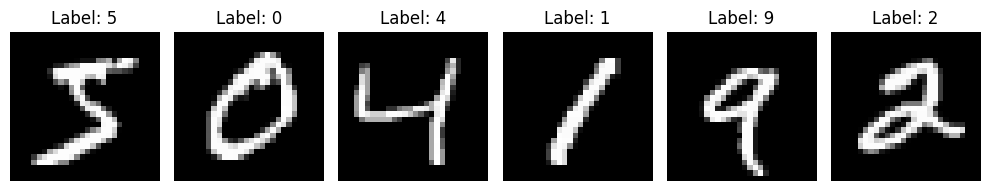

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Print 4 images in a row
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Fully connected modell (mnits documentacion)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data: flatten the images and normalize the pixel values
train_images = train_images.reshape((train_images.shape[0], 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28 * 28)).astype('float32') / 255

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


Epoch 1/5


c:\Users\natib\OneDrive\Documents\Abschlussprojekt-cnn-digit-recognition\venv_py310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.8768 - loss: 0.4360
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.9629 - loss: 0.1271
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.9753 - loss: 0.0826
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.9826 - loss: 0.0589
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9857 - loss: 0.0460
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.9763 - loss: 0.0777
Test accuracy: 0.9779000282287598


Mnist arrays data (book)
"DESCR" description of the dataset
"data"  The input data, usually as a 2D NumPy array 
"target" The labels, usually as a 1D NumPy array

In [3]:
from sklearn.datasets import fetch_openml
#fetch downland the real life dataset returns data frame and labels
mnist = fetch_openml('mnist_784', as_frame = False)
X, y = mnist.data,mnist.target
print(X)
print(X.shape)
print(y)
#70000 images has 784 features (28x28 pixels) pixel's intensity 0-255 (white-balck)
print(y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(70000, 784)
['5' '0' '4' ... '4' '5' '6']
(70000,)


Show number

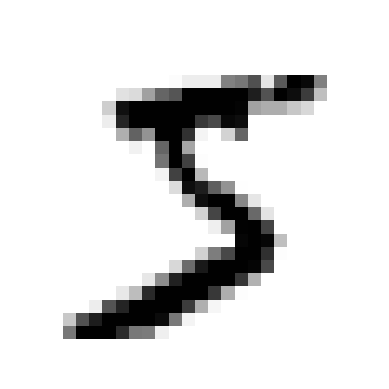

5


In [4]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap="binary") # greyscale color map
    plt.axis("off")
    
#first digit
some_digit = X[0]
plot_digit(some_digit)

#show inverse biggest number black
plt.show()

#print label
print(y[0])

# X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:] 
# # first 60000 number traning data last 10000 test

Binary Classifier

In [5]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:] 
y_train_5 = (y_train == '5') #True if 5, other Fale if other
y_test_5 = (y_test == '5')

from sklearn.linear_model import SGDClassifier

sgd_clf =SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
print(sgd_clf.predict([some_digit]))

[ True]


Measuring Accuracy (Cross-Validation)

In [ ]:
from sklearn.model_selection import cross_val_score
#%
print(cross_val_score(sgd_clf,X_train,y_train_5, cv= 3, scoring= "accuracy"))

[0.95035 0.96035 0.9604 ]


Salt pepper

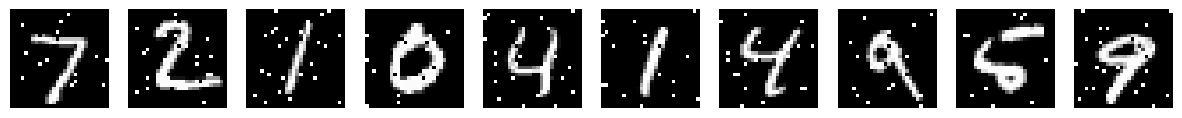

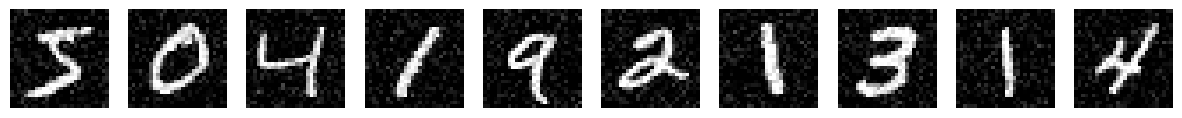

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0  # Normalisate
x_test = x_test.astype("float32") / 255.0

#salt and pepper
def add_salt_and_pepper_noise(images, prob=0.05):
    noisy_images = images.copy()
    for i in range(images.shape[0]):
        mask = np.random.choice([0, 1, 2], size=images[i].shape, p=[prob / 2, prob / 2, 1 - prob])
        noisy_images[i][mask == 0] = 0.0  
        noisy_images[i][mask == 1] = 1.0  
    return noisy_images

#gaussian noise
def add_gaussian_noise(images, mean=0, stddev=0.1):
    noise = np.random.normal(mean, stddev, images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0, 1)

# images with gaussian
x_train_noisy = add_gaussian_noise(x_train)

# images with salt and pepper
noisy_images = add_salt_and_pepper_noise(x_test)  

# Show images
def show_images(images):
    fig, axes = plt.subplots(1, 10, figsize=(15, 3))
    
    for i, ax in enumerate(axes):
      ax.imshow(images[i].squeeze(), cmap="gray")  # greysale
      ax.axis("off")
      
    plt.show()
    
show_images(noisy_images)
show_images(x_train_noisy)
